In [1]:
# Problem_2_Soln.py
import tensorflow as tf

# First I will define function f(x, y, z)
def f(x, y, z):
    return x/y + z**2 + tf.math.sigmoid(x)

# To define initial values
x = tf.constant(-1.0)
y = tf.constant(2.0)
z = tf.constant(3.0)


with tf.GradientTape(persistent=True) as tape:
    tape.watch([x, y, z])
    result = f(x, y, z)

# Now to calculate partial derivatives
df_dx = tape.gradient(result, x)
df_dy = tape.gradient(result, y)
df_dz = tape.gradient(result, z)

# Now to clean up resources
del tape

# Print the results
print("Partial derivative of f with respect to x is :", df_dx.numpy())
print("Partial derivative of f with respect to y is :", df_dy.numpy())
print("Partial derivative of f with respect to z is :", df_dz.numpy())



Partial derivative of f with respect to x is : 0.69661194
Partial derivative of f with respect to y is : 0.25
Partial derivative of f with respect to z is : 6.0


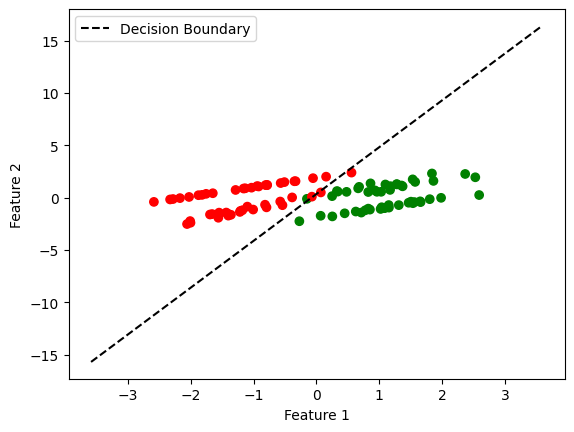

In [2]:
# Problem_3_Soln.py
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now to train a binary classification model (I will use logistic regression)

model = LogisticRegression()
model.fit(X_train, y_train)

# Define a decision boundary line and plot the data points

# Decision boundary parameters
w = model.coef_[0]
b = model.intercept_

# Generate a range of x values
x_boundary = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

# Calculate the corresponding y values for the decision boundary
y_boundary = -(w[0] / w[1]) * x_boundary - (b / w[1])

# Plot the data points with different colors
plt.scatter(X[:, 0], X[:, 1], c=['green' if label == 1 else 'red' for label in y], marker='o')

# Plot the decision boundary as a dashed black line
plt.plot(x_boundary, y_boundary, '--k', label='Decision Boundary')

# Customize the plot

# Set axis labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()




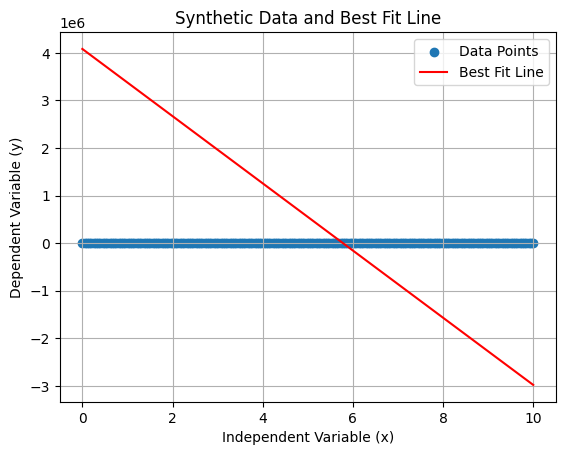

Learned Parameters:
Weight (slope): -706282.94
Bias (intercept): 4082845.5


In [3]:
# Problem_4_Soln.py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# First to generate synthetic data
np.random.seed(0) 
num_points = 200
x = np.linspace(0, 10, num_points)
y_true = 0.1 * x - 1  # This is for true linear relationship without noise
noise = np.random.normal(0, 0.2, num_points)  # Gaussian noise with std. dev. 0.2
y = y_true + noise

# Now to define linear regression model
class LinearRegression(tf.Module):
    def __init__(self):
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def __call__(self, x):
        return self.w * x + self.b

# Now to define loss function (mean squared error)
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# optimization algorithm (gradient descent)
def gradient_descent(model, x, y, learning_rate):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_squared_error(y, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    model.w.assign_sub(learning_rate * grads[0])
    model.b.assign_sub(learning_rate * grads[1])

# Create model
model = LinearRegression()

# Training parameters
learning_rate = 0.01
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Perform gradient descent
    gradient_descent(model, x, y, learning_rate)

# Plot synthetic data points and the best-fit line
plt.scatter(x, y, label='Data Points')
plt.plot(x, model(x), color='red', label='Best Fit Line')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.title('Synthetic Data and Best Fit Line')
plt.grid(True)
plt.show()

# Display learned parameters
print("Learned Parameters:")
print("Weight (slope):", model.w.numpy())
print("Bias (intercept):", model.b.numpy())
